In [2]:
import tensorflow as tf
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt

IMG_SIZE = (224,224)

2021-09-19 15:02:38.593849: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-19 15:02:38.593882: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
# Recreate the exact same model, including its weights and the optimizer
final_model = tf.keras.models.load_model('/home/tamtran/Desktop/wk8_VN_currency_classification/mobilenetv2_v2.h5')

# We need to define its optimizer and loss function again since the h5 file
# does not contain those information :(
final_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Show the model architecture
final_model.summary()


2021-09-19 15:02:45.231430: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-09-19 15:02:45.231469: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-19 15:02:45.231506: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (TranTran): /proc/driver/nvidia/version does not exist


Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf.math.truediv_5 (TFOpLambd (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.subtract_5 (TFOpLamb (None, 224, 224, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_5 ( (None, 1280)              0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 1280)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               3279

In [23]:
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg

class_names =[  '1000',
                '10000',
                '100000',
                '2000',
                '20000',
                '200000',
                '5000',
                '50000',
                '500000']

def get_top_prediction(prediction, top, class_names):
    for i in range(top):
        top_confidence = list(np.sort(prediction)[0][::-1])[:top]
        top_id = list(np.argsort(prediction, axis=1)[0][::-1])[:top]
        top_class_names = [class_names[id] for id in top_id]

    return top_confidence, top_id, top_class_names

def predict(model, image_path, img_size, class_names):
    '''
    return: (top3confidence, top3id, top3name)

    '''
    img = image.load_img(image_path, target_size=(img_size[0], img_size[1]))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    prediction = model.predict(img)
    
    # pred = class_names[prediction.argmax()]
    # confidence = round(np.max(prediction),4)*100
    
    top3confidence, top3id, top3name = get_top_prediction(prediction = prediction, 
                                                            top = 3, 
                                                            class_names = class_names)

    plt.figure(figsize=(9, 6))
    img = mpimg.imread(image_path)
    imgplot = plt.imshow(img)
    plt.title(f'1st: {top3name[0]} with {np.round(top3confidence[0]*100, 2)}% confidence\n\
                2nd: {top3name[1]} with {np.round(top3confidence[1]*100, 2)}% confidence\n\
                3rd: {top3name[2]} with {np.round(top3confidence[2]*100, 2)}% confidence\n')
    plt.grid(b=None)
    plt.axis('off')
    plt.show()

    return top3confidence, top3id, top3name


# Streamlit

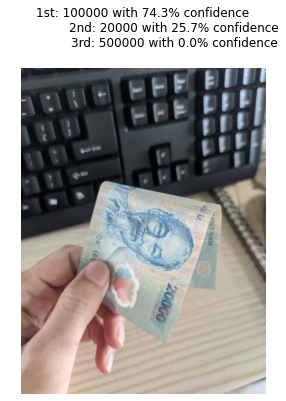

['100000', '20000', '500000']

In [7]:
# Initial variables:
save_dir = '/home/tamtran/Desktop/wk8_VN_currency_classification/'
img_path = '/home/tamtran/Desktop/wk8_VN_currency_classification/test_images/money_test/PXL_20210918_073654073.MP.jpg'
true_label = '20000'
BATCH_SIZE = 32

predict(final_model, img_path, IMG_SIZE, class_names)

In [8]:
img_augmentation = tf.keras.Sequential([
            tf.keras.layers.experimental.preprocessing.RandomRotation(0.3),
            tf.keras.layers.experimental.preprocessing.RandomZoom(0.3, fill_mode='constant'),
            ])

In [9]:
def preprocessing_img(img):
    # img_array = tf.image.resize(img, IMG_SIZE)
    img_array = tf.keras.preprocessing.image.load_img(img, target_size=(400,400))
    img_array = tf.keras.preprocessing.image.img_to_array(img_array)
    img_array = tf.expand_dims(img_array, axis=0)
    return img_array


# preprocessing_img(img)

In [10]:
class_names

['1000',
 '10000',
 '100000',
 '2000',
 '20000',
 '200000',
 '5000',
 '50000',
 '500000']

In [11]:
def create_augmentated_images(img_path, save_dir, true_label, quantity_aug_image):
    '''
    return (`aug_directory`, `class_directory`)
    '''

    import os
    from keras.preprocessing.image import save_img
    import random

    # img = '/home/tamtran/Desktop/wk8_VN_currency_classification/test_images/20k.jpeg'
    img = img_path
    aug_dir = save_dir+'/aug_imgs'
    class_dir = os.path.join(aug_dir, true_label)
    try:
        os.mkdir(aug_dir)
    except:
        try:
            for cl in class_names:
                cl_path = os.path.join(aug_dir, cl)
                os.mkdir(cl_path)
        except:
            pass
    try:
        for cl in class_names:
            cl_path = os.path.join(aug_dir, cl)
            os.mkdir(cl_path)
    except:
        pass

    total_imgs = quantity_aug_image
    for i in range(total_imgs):
        rd_num = str(int(round(random.random()*10000,0)))
        img_ar = preprocessing_img(img)
        augmented_img = img_augmentation(img_ar)
        file_path = class_dir+'/'+rd_num+true_label+'.jpg'
        save_img(file_path, augmented_img[0])
    print(f'{total_imgs} augmentated images were created')

    return aug_dir, class_dir

aug_dir, class_dir = create_augmentated_images(img_path, 
                    save_dir, 
                    true_label,
                    10)

10 augmentated images were created


In [12]:
true_label

'20000'

In [13]:
# Make dataset:
def make_aug_ds(aug_dir, img_size, batch_size):
    import glob, os
    aug_ds = tf.keras.preprocessing.image_dataset_from_directory(
        aug_dir,
        batch_size = batch_size,
        image_size = img_size,
    )
    return aug_ds


In [14]:
aug_ds = make_aug_ds(aug_dir, IMG_SIZE, BATCH_SIZE)

Found 10 files belonging to 9 classes.


In [15]:
aug_ds.class_names

['1000',
 '10000',
 '100000',
 '2000',
 '20000',
 '200000',
 '5000',
 '50000',
 '500000']

In [16]:
# fit with model
history = final_model.fit(aug_ds, epochs=3)

Epoch 1/3


2021-09-19 15:03:48.207526: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 48168960 exceeds 10% of free system memory.
2021-09-19 15:03:48.236218: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 49032960 exceeds 10% of free system memory.


1/1 [==============================] - 6s 6s/step - loss: 2.0942 - accuracy: 0.2000
Epoch 2/3


2021-09-19 15:03:48.781584: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 48168960 exceeds 10% of free system memory.
2021-09-19 15:03:48.812079: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 49032960 exceeds 10% of free system memory.


1/1 [==============================] - 1s 552ms/step - loss: 6.6551e-04 - accuracy: 1.0000
Epoch 3/3


2021-09-19 15:03:49.355922: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 48168960 exceeds 10% of free system memory.


1/1 [==============================] - 1s 596ms/step - loss: 2.3842e-08 - accuracy: 1.0000


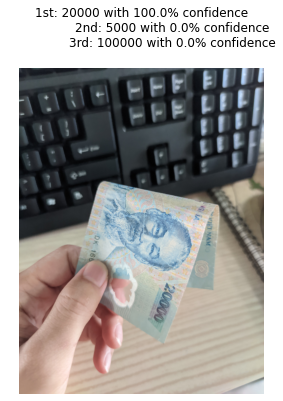

['20000', '5000', '100000']

In [17]:
predict(final_model, img_path, IMG_SIZE, class_names)

In [18]:
def after_fitting_model(model, class_dir):
    import os
    # Save model:
    model.save('/home/tamtran/Desktop/wk8_VN_currency_classification/mobilenetv2_v2.h5')
    print('=> Model was saved! <=')

    # Delete all files in class_dir
    files = os.listdir(class_dir)
    for f in files:
        f_path = os.path.join(class_dir, f)
        os.remove(f_path)
    print('=> All updated files been removed <=')

after_fitting_model(final_model, class_dir)

/home/tamtran/miniconda3/envs/ml30/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


=> Model was saved! <=
=> All updated files been removed <=


# test webcame

In [9]:
import cv2

cam = cv2.VideoCapture(0)

img_counter = 0
while True:
    ret, frame = cam.read()
    if not ret:
        print('failed to grab frame')
        break
    cv2.imshow('imshow', frame)
    
    k=cv2.waitKey(1)
    if k%256 == 27:
        print('escape hit!')
        break
    elif k%256 == 32:
        img_name = 'opencv_frame_{}.png'.format(img_counter)
        cv2.imwrite(img_name, frame)
        img_counter += 1

cam.release()
cv2.destroyAllWindows()

'/home/tamtran/Desktop/wk8_VN_currency_classification//aug_imgs/20000'